<a href="https://colab.research.google.com/github/amartinez-se/03MIAR---Algoritmos-de-Optimizacion-2025/blob/main/03MIAR_AG1(Divide_y_vencer%C3%A1s%2C_Voraz%2C_Backtracking).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 1 de Algoritmos de Optimizacion


Nombre: Asier Martínez San Esteban

Notebook: https://colab.research.google.com/drive/1nirozbG2xnB8_JfVX3H7G9iLh2PseT7C?usp=sharing

Proyecto GitHub: https://github.com/amartinez-se/03MIAR---Algoritmos-de-Optimizacion-2025

---


## Torres de Hanoi - Divide y venceras
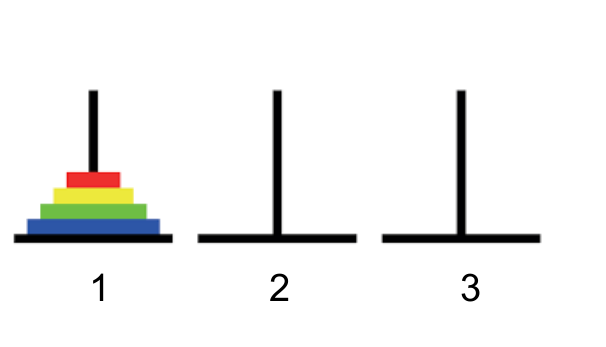

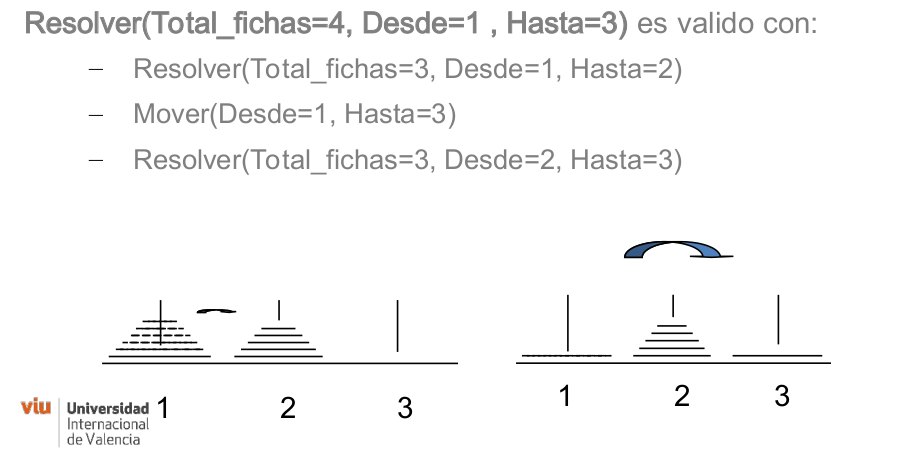

In [44]:
# Torres de Hanoi - Divide y venceras

def Resolver(N, desde, hasta):
  '''
  > N - Nº de fichas
  > desde - torre inicial
  > hasta - torre final
  '''
  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

  else:
    Resolver(N-1, desde, 6-desde-hasta)
    '''
    6 - desde - hasta es la forma de modelar la torre pivote.
    Primero se llevan las fichas a la torre pivote y después,
    desde la torre pivote hasta el destino final (hasta)
    '''
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

    Resolver(N-1, 6-desde-hasta,  hasta)


Resolver(3, 1, 3)


Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3


#### Desglose de la ejecución (Trace) para N=3

Cuando se llama a Resolver(3, 1, 3), el algoritmo divide el problema en subproblemas más pequeños:

* Llamada Principal: Resolver(3, 1, 3)

  * (Entra al else)
  * 1 - Llamada Recursiva: Resolver(2, 1, 2) (Mover 2 fichas a la torre auxiliar
    * 1.1 Llamada Recursiva: Resolver(1, 1, 3)
      * (Entra al if N==1)
      * **IMPRIME: "Lleva la ficha desde 1 hasta 3"**
    * **IMPRIME: "Lleva la ficha desde 1 hasta 2" (Movimiento del disco 2)**
    * 1.2 Llamada Recursiva: Resolver(1, 3, 2)
      * (Entra al if N==1)
      * **IMPRIME: "Lleva la ficha desde 3 hasta 2"**
  * **IMPRIME: "Lleva la ficha desde 1 hasta 3" (Movimiento del disco mayor/base)**

  * 2 - Llamada Recursiva: Resolver(2, 2, 3) (Mover las 2 fichas de la auxiliar al destino)

    * 2.1 Llamada Recursiva: Resolver(1, 2, 1)

      * (Entra al if N==1)
      * **IMPRIME: "Lleva la ficha desde 2 hasta 1"**
    * **IMPRIME: "Lleva la ficha desde 2 hasta 3" (Movimiento del disco 2)**
    * 2.2 Llamada Recursiva: Resolver(1, 1, 3)
      * (Entra al if N==1)
      * IMPRIME: "Lleva la ficha desde 1 hasta 3"

Total de movimientos realizados: 7

## Cambio de monedas - Técnica voraz

In [45]:
# Cambio de monedas - Técnica voraz

SISTEMA = [11, 5 ,1  ]
SISTEMA.sort(reverse=True)

def cambio_monedas(CANTIDAD,SISTEMA):

  SOLUCION = [0 for elem in SISTEMA]
  ValorAcumulado = 0

  for i,valor in enumerate(SISTEMA):
    monedas = (CANTIDAD-ValorAcumulado)//valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor

    if CANTIDAD == ValorAcumulado:
      return SOLUCION

  print("No es posible encontrar solucion")

cambio_monedas(15,SISTEMA)

[1, 0, 4]

In [46]:
# El '1' indica que el contador inicia en 1

import numpy as np
import pandas as pd

arr = np.array(SISTEMA)
serie = pd.Series(SISTEMA)

for i, componente in enumerate(serie, start=1):
    print(f"{i}. {componente}")

1. 11
2. 5
3. 1


## N Reinas - Vuelta Atrás(Backtracking)
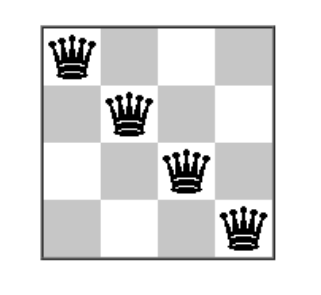

In [47]:
# N Reinas - Vuelta Atrás()

# Verifica que en la solución parcial no hay amenzas entre reinas

def es_prometedora(SOLUCION,etapa):
  # print(SOLUCION)
  ''' Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  '''
  for i in range(etapa+1):
    # print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False

    # Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      # print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

def escribe_solucion(S):
  '''  Traduce la solución al tablero
  '''
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" · ", end="")

def reinas(N, solucion=[],etapa=0):

  if len(solucion) == 0:         # [0,0,0...]
    solucion = [0 for i in range(N) ]

  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
      else:
        reinas(N, solucion, etapa+1)
    else:
      None

  solucion[etapa] = 0

reinas(4,solucion=[],etapa=0)

[2, 4, 1, 3]
[3, 1, 4, 2]


In [48]:
escribe_solucion([2, 4, 1, 3])


 ·  ·  X  · 
 X  ·  ·  · 
 ·  ·  ·  X 
 ·  X  ·  · 

# Práctica Individual
---

## Problema: Encontrar los dos puntos más cercanos
Dado un conjunto de puntos se  trata de encontrar los dos puntos más cercanos

### Fuerza bruta:
```
# DISCLAIMER: la idea de este algoritmo es propia. Para la programación al detalle, se ha empleado Gemini en colab. Considero que ésta filosofía se alinea con la de ésta asignatura, ya que el valor hoy en día reside en saber pensar de manera estructurada, no en perder el tiempo picando código.
```

In [49]:
import numpy as np

# Crear array 1d con numpy
arr_1d = np.round(np.random.uniform(0, 10, size=10), 2).reshape(1, -1)
print(arr_1d)

[[4.4  7.13 2.45 1.7  3.4  5.38 0.55 4.55 2.28 5.52]]


In [50]:
# Crear una matriz cuadrada con la dimensión del array
size = arr_1d.shape[1]
matriz_cuadrada = np.full((size, size), np.inf)

In [51]:
# Colocar en la matriz la distancia entre todos los elementos del array, dos a dos
# (índices i,j indican los elementos que se restan -> diagonal principal = infinito para poder detectar números iguales)
for i,num in enumerate(arr_1d[0]):
  for j,num2 in enumerate(arr_1d[0]):
    if i != j:
      matriz_cuadrada[i][j] = abs(num-num2)

In [52]:
# Encontrar el mínimo valor no cero en la matriz_cuadrada
min_val = np.min(matriz_cuadrada)

# Obtener los índices de ese valor mínimo
min_idx = np.where(matriz_cuadrada == min_val)

# Recuperar los dos números más cercanos de arr_1d
num1 = arr_1d[0, min_idx[0][0]]
num2 = arr_1d[0, min_idx[0][1]]

print(f"Distancia mínima = {min_val}")
print(f"Números más cercanos = {num1} y {num2}")

Distancia mínima = 0.13999999999999968
Números más cercanos = 5.38 y 5.52


In [53]:
def fuerza_bruta_matriz(arr):
  size = arr.shape[1]
  matriz_cuadrada = np.full((size, size),np.inf)

  for i,num in enumerate(arr[0]):
    for j,num2 in enumerate(arr[0]):
      if i != j:
        matriz_cuadrada[i][j] = abs(num-num2)

  min_val = np.min(matriz_cuadrada)

  min_idx = np.where(matriz_cuadrada == min_val)

  num1 = arr[0, min_idx[0][0]]
  num2 = arr[0, min_idx[0][1]]

  print(f"Distancia mínima = {min_val}")
  print(f"Números más cercanos = {num1} y {num2}")

Mientras escribía el algoritmo en forma de función he visto que la matriz es innecesaria, evitando el paso de buscar el mínimo en ella.

In [54]:
def fuerza_bruta(arr):
    min_val = float('inf')
    A,B = None,None

    for i,num in enumerate(arr[0]):
      for j,num2 in enumerate(arr[0]):
        d = abs(num-num2)
        if d < min_val:
          min_val = d
          A,B = num,num2

    print(f"Distancia mínima = {min_val}")
    print(f"Números más cercanos = {A} y {B}")
    return min_val, (A,B)

In [55]:
arr_1d = np.round(np.random.uniform(0, 10, size=10), 2).reshape(1, -1)
fuerza_bruta_matriz(arr_1d)
fuerza_bruta(arr_1d)

Distancia mínima = 0.010000000000000675
Números más cercanos = 4.89 y 4.9
Distancia mínima = 0.0
Números más cercanos = 0.87 y 0.87


(np.float64(0.0), (np.float64(0.87), np.float64(0.87)))

#### Cálculo de la complejidad:
En un primer análisis, dado que se crea una matriz NxN la complejidad es N^2, además de consumir espacio en memoria también N^2.
Recorre dos veces el array para calcular todos los índices, lo cual es de complejidad N^2.
Las operaciones para obtener el valor mínimo de la matriz y sus índices son también de N^2 al quedar supeditadas a recorrer la matriz.

En resumen, el orden de complejidad del algoritmo propuesto por fuerza bruta es O(N^2). Sin embargo, al comparar mi análisis con el de Gemini 3 Pro, éste ha ido un paso más allá.

Es simple y una vez se ve, uno se siente profundamente torpe, pero el hecho de ordenar la lista antes de calcular las distancias hace que no sea necesario dos bucles.

In [56]:
def sorting(arr):
  # Ordenar el arr_1d de menor a mayor
  sorted_arr_1d = np.sort(arr[0])

  # Crear un vector con la diferencia de los valores consecutivos (distancia)
  dist = np.diff(sorted_arr_1d)

  # Obtener la menor distancia
  min_val = np.min(dist)

  # Obtener índice y números más cercanos
  min_val_idx = np.argmin(dist)

  num1 = sorted_arr_1d[min_val_idx]
  num2 = sorted_arr_1d[min_val_idx + 1]

  print(f"Distancia mínima = {min_val}")
  print(f"Números más cercanos = {num1} y {num2}")

In [57]:
# arr_1d = np.round(np.random.uniform(0, 10, size=10), 2).reshape(1, -1)
sorting(arr_1d)

Distancia mínima = 0.010000000000000675
Números más cercanos = 4.89 y 4.9


De esta forma, el orden de complejidad se reduce a la ordenación **O(N*log(N))**, ya que recorrer la lista para encontrar el mínimo tiene O(N).

### Divide y vencerás
---

Pienso en divide y vencerás como reducir el problema a la mínima expresión: obtener la distancia entre dos elementos. la distancia entre dos elementos

In [58]:
import numpy as np

def divide_y_venceras(arr):
    arr_sorted = np.sort(arr)

    distancia, (p1, p2) = recursivo(arr_sorted, 0, len(arr_sorted) - 1)

    print(f"Distancia mínima: {distancia}")
    print(f"Entre los elementos: {p1} y {p2}")
    return distancia, p1, p2

def recursivo(arr, first, last):
    n_elementos = last - first + 1

    if n_elementos < 2:
        return np.inf,(None,None)

    if n_elementos == 2:
        dist = arr[last] - arr[first]
        return dist, (arr[first], arr[last])

    # Dividir
    mid = (first + last) // 2

    dist_inf, pareja_inf = recursivo(arr, first, mid)
    dist_sup, pareja_sup = recursivo(arr, mid + 1, last)

    # Elegimos al mejor candidato actual (Inferior vs Superior)
    if dist_inf < dist_sup:
        min_actual = dist_inf
        pareja_actual = pareja_inf
    else:
        min_actual = dist_sup
        pareja_actual = pareja_sup


    # El paso de combinar ambas mitades es crítico ya que evalúa si dos puntos en la frontera de la
    # separación escogida estuvieran más cerca que el par con distancia mínima detectado en cada conjunto por separado.
    # Se visualiza más fácil con un ejemplo sencillo: [1, 5, 10, 12, 20, 25]
    # Separando en "izq" y "der" evaluamos [1, 5, 10] y [12, 20, 25]. La mínima distancia son 4 (5-1) y 5 (25-20). El algoritmo se queda con min_dist 4.
    # En este punto, cabe la posibilidad de que dos numeros muy próximos hayan caído en dos mitadesd distintas.

    val_izq_borde = arr[mid]
    val_der_borde = arr[mid+1]
    dist_cruce = val_der_borde - val_izq_borde

    if dist_cruce < min_actual:
        return dist_cruce, (val_izq_borde, val_der_borde)
    else:
        return min_actual, pareja_actual

### Complejidad: O(N log(N)) + O(N) = O(N log(N))
* Al ser necesario ordenar, la complejidad parte de O(N*log(N)).

* Análisis de la complejidad de la función recursivo() -> 2T(N/2) + O(1):

  1. La recursión ocurre dos veces (parte inferior y parte superior) y en cada paso se computan N/2 de los datos, de manera que

          T(N) = 2 T(N/2)

      Esto difiere con las Torres de Hanoi, donde en cada paso computábamos N-1 elementos, y por tanto teníamos N pasos, dando lugar a 2^n.

  2. El resto de operaciones son simples (no hay bucles). Complejidad O(1).

#### Comparación entre algoritmos 1D
---

In [59]:
import time

arr_1d = np.round(np.random.uniform(0, 100000, size=5000), 2).reshape(1,-1)

print('----- Fuerza bruta con matriz -> O(N^2) -----')
start_time = time.time()
fuerza_bruta_matriz(arr_1d)
end_time = time.time()
print(f"-> Tiempo: {end_time - start_time:.4f} s\n")

print('----- Fuerza bruta sin matriz -> O(N^2) -----')
start_time = time.time()
fuerza_bruta(arr_1d)
end_time = time.time()
print(f"-> Tiempo: {end_time - start_time:.4f} s\n")

print('----- Sorting -> O(N*log(N))-----')
start_time = time.time()
sorting(arr_1d)
end_time = time.time()
print(f"-> Tiempo: {end_time - start_time:.4f} s\n")

print('----- Divide y vencerás -----')
start_time = time.time()
divide_y_venceras(arr_1d[0])
end_time = time.time()
print(f"-> Tiempo: {end_time - start_time:.4f} s\n")


----- Fuerza bruta con matriz -> O(N^2) -----
Distancia mínima = 0.0
Números más cercanos = 93921.98 y 93921.98
-> Tiempo: 13.8549 s

----- Fuerza bruta sin matriz -> O(N^2) -----
Distancia mínima = 0.0
Números más cercanos = 80399.14 y 80399.14
-> Tiempo: 5.7191 s

----- Sorting -> O(N*log(N))-----
Distancia mínima = 0.0
Números más cercanos = 93921.98 y 93921.98
-> Tiempo: 0.0006 s

----- Divide y vencerás -----
Distancia mínima: 0.0
Entre los elementos: 93921.98 y 93921.98
-> Tiempo: 0.0035 s



Con estos resultados, queda claro que el algoritmo que ordena la lista es el mejor. Al emplear una función de numpy (.sort()) optimizada en C, es con mucha diferencia el mejor.

Divide y vencerás le sigue de más o menos cerca. También aplica .sort() y el hecho de dividir de manera recursiva el trabajo, da buen resultado.

La fuerza bruta queda atrás en seguida. Para este ejemplo, es 1400 veces peor que Divide y vencerás. Sin embargo, entre ambos algoritmos de fuerza bruta, el que emplea la matriz es más lento ya que rellena la segunda mitad de la  matriz con valores repetidos, lo cual es innecesario.

### Fuerza bruta 2D
---

En 2D, la distancia entre dos puntos es el módulo del vector que los une, es decir, la distancia euclídea.

No cuesta demasiado trabajo reformar el algoritmo de fuerza bruta para que acepte arrays en 2D

In [60]:
def dist_euclidea(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def fuerza_bruta_2d(arr):
    min_val = float('inf')
    A,B = None,None

    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            d = dist_euclidea(arr[i], arr[j])
            if d < min_val:
                min_val = d
                A,B = arr[i], arr[j]

    print(f"Distancia mínima = {min_val}")
    print(f"Números más cercanos = {A} y {B}")
    return min_val, (A,B)

arr_2d = np.round(np.random.uniform(0, 10, size=(5,2)), 2)
fuerza_bruta_2d(arr_2d)

Distancia mínima = 2.6752569970004756
Números más cercanos = [8.33 2.28] y [7.66 4.87]


(np.float64(2.6752569970004756), (array([8.33, 2.28]), array([7.66, 4.87])))

### Divide y vencerás 2D
---

En 2d, el punto medio (mid) que se empleaba en 1D para dividir el array, ahora es una recta.

In [61]:
import numpy as np

def divide_y_venceras_2d(arr):
    # Ordenamos por coordenada X (Columna 0) para poder dividir geométricamente izquierda/derecha
    idx_x = np.argsort(arr[:, 0])
    arr_sorted_x = arr[idx_x]
    distancia, min_par = recursivo_2d(arr_sorted_x)

    return distancia, min_par

def recursivo_2d(arr_x):
    n = len(arr_x)

    # Aquí termina el algoritmo. Cuando el array contenga 3 puntos, realizar el cálculo por fuerza bruta para mejor eficiencia.
    if n <= 3:
        return fuerza_bruta_2d(arr_x)

    mid = n // 2
    punto_medio = arr_x[mid] # Este punto define la línea divisoria vertical

    izq_x = arr_x[:mid]
    der_x = arr_x[mid:]

    d_izq, par_izq = recursivo_2d(izq_x)
    d_der, par_der = recursivo_2d(der_x)

    # Elegimos el mejor actual
    if d_izq < d_der:
        min_dist = d_izq
        min_par = par_izq
    else:
        min_dist = d_der
        min_par = par_der

    # Para 1D se miran los puntos que quedan separados por la división.
    # Para ampliar a 2D, la separación es una línea divisoria, por lo que es necesario introducir el concepto de franja

    # Crear la Franja: con los puntos que están (a una distancia menor que 'min_dist' en el eje X) de la franja divisoria
    mask = np.abs(arr_x[:, 0] - punto_medio[0]) < min_dist
    franja = arr_x[mask]


    # Ordenar la franja por Eje Y para no comparar todos contra todos
    idx_y = np.argsort(franja[:, 1])
    franja_y = franja[idx_y]

    # Recorrer la franja
    len_franja = len(franja_y)

    for i in range(len_franja):
        for j in range(i + 1, len_franja):
            p1 = franja_y[i]
            p2 = franja_y[j]

            # Si la distancia vertical supera el mínimo actual, no hace falta seguir mirando
            if (p2[1] - p1[1]) >= min_dist:
                break

            d = dist_euclidea(p1, p2)
            if d < min_dist:
                min_dist = d
                min_par = (p1, p2)

    return min_dist, min_par

Distancia mínima = 8.867164146445017
Números más cercanos = [0.97 6.31] y [7.22 0.02]
Distancia mínima = 1.584171707865027
Números más cercanos = [7.42 8.06] y [8.52 9.2 ]


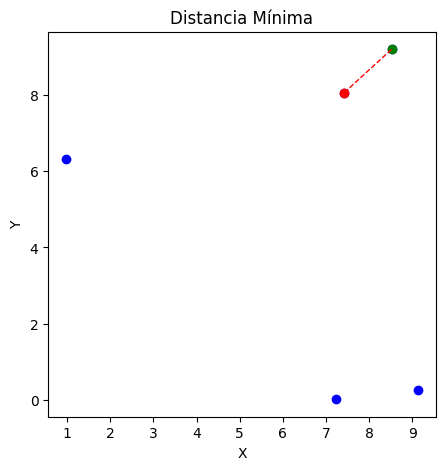

In [62]:
# Código necesario para representación asistido por Gemini 3

import matplotlib.pyplot as plt

arr_2d = np.round(np.random.uniform(0, 10, size=(5,2)), 2)
min_dist, closest_pair = divide_y_venceras_2d(arr_2d)

plt.figure(figsize=(5, 5))
plt.scatter(arr_2d[:, 0], arr_2d[:, 1], color='blue')

plt.scatter(closest_pair[0][0], closest_pair[0][1], color='red')
plt.scatter(closest_pair[1][0], closest_pair[1][1], color='green')
plt.plot([closest_pair[0][0], closest_pair[1][0]],
         [closest_pair[0][1], closest_pair[1][1]],
          color='red', linestyle='--', linewidth=1)

plt.title('Distancia Mínima')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Divide y vencerás 3D
---

Ahora la división entre los dos conjuntos la marca un plano

In [63]:
import numpy as np

def fuerza_bruta_3d(puntos):
    min_dist = float('inf')
    min_par = None
    n = len(puntos)
    for i in range(n):
        for j in range(i + 1, n):
            d = np.linalg.norm(puntos[i]-puntos[j]) # Se emplea numpy para calcular la norma
            if d < min_dist:
                min_dist = d
                min_par = (puntos[i], puntos[j])

    return min_dist, min_par

def divide_y_venceras_3d(arr):
    # Ordenamos por coordenada X (Columna 0) para poder dividir el cubo geométricamente izquierda/derecha
    idx_x = np.argsort(arr[:, 0])
    arr_sorted_x = arr[idx_x]

    distancia, min_par = recursivo_3d(arr_sorted_x)

    return distancia, min_par

def recursivo_3d(arr_x):
    n = len(arr_x)

    # CASO BASE: Si hay pocos puntos, fuerza bruta es más rápido
    if n <= 3:
        return fuerza_bruta_3d(arr_x)

    mid = n // 2
    punto_medio = arr_x[mid]

    izq_x = arr_x[:mid]
    der_x = arr_x[mid:]

    # Llamada recursiva
    d_izq, par_izq = recursivo_3d(izq_x)
    d_der, par_der = recursivo_3d(der_x)

    # Elegimos el mejor actual
    if d_izq < d_der:
        min_dist = d_izq
        min_par = par_izq
    else:
        min_dist = d_der
        min_par = par_der

    # --- COMBINAR (La Franja 3D / Slab) ---
    # Para 1D se miran los puntos que quedan separados por la división.
    # Para ampliar a 2D, la separación es una línea divisoria, por lo que es necesario introducir el concepto de franja
    # Para 3D, la separación es un plano, por lo que es necesario introducir el concepto de "losa" o Slab para hablar de un plano con profundidad

    # Crear la Losa con los puntos que están (a una distancia menor que 'min_dist' en el eje X) del plano divisorio
    mask = np.abs(arr_x[:, 0] - punto_medio[0]) < min_dist
    franja = arr_x[mask]

    # Ordenar la franja por Eje Y para no comparar todos contra todos
    idx_y = np.argsort(franja[:, 1])
    franja_y = franja[idx_y]

    len_franja = len(franja_y)

    # Recorrer la franja
    for i in range(len_franja):
        # Misma lógica que en 2D
        for j in range(i + 1, len_franja):
            p1 = franja_y[i]
            p2 = franja_y[j]

            if (p2[1] - p1[1]) >= min_dist:
                break

            # 3. Calcular distancia real 3D
            d = np.linalg.norm(p1-p2)
            if d < min_dist:
                min_dist = d
                min_par = (p1, p2)

    return min_dist, min_par

Distancia mínima calculada: 4.4025
Punto 1: [46.84583162 42.01847774 97.53723076]
Punto 2: [45.6454864  45.79455894 99.45625351]


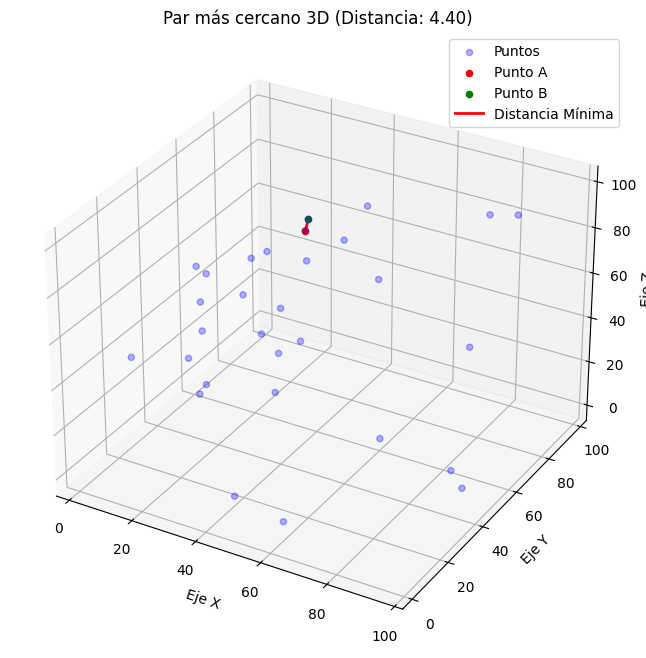

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Necesario para la proyección 3D

arr_3d = np.random.rand(30, 3) * 100

dist, par = divide_y_venceras_3d(arr_3d)
p1, p2 = par

print(f"Distancia mínima calculada: {dist:.4f}")
print(f"Punto 1: {p1}")
print(f"Punto 2: {p2}")

# Visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(arr_3d[:, 0], arr_3d[:, 1], arr_3d[:, 2],
           c='blue', marker='o', alpha=0.3, label='Puntos')

ax.scatter(p1[0], p1[1], p1[2], c='red', label='Punto A')
ax.scatter(p2[0], p2[1], p2[2], c='green', label='Punto B')

ax.plot([p1[0], p2[0]],
        [p1[1], p2[1]],
        [p1[2], p2[2]],
        color='red', linestyle='-', linewidth=2, label='Distancia Mínima')

ax.set_title(f'Par más cercano 3D (Distancia: {dist:.2f})')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.legend()

plt.show()

In [65]:
dist, par = fuerza_bruta_3d(arr_3d)
p1, p2 = par
print(f"Distancia mínima calculada: {dist:.4f}")
print(f"Punto 1: {p1}")
print(f"Punto 2: {p2}")

Distancia mínima calculada: 4.4025
Punto 1: [46.84583162 42.01847774 97.53723076]
Punto 2: [45.6454864  45.79455894 99.45625351]


A modo de conclusión, el escalado a 2 y 3 dimensiones me ha ayudado a comprender de verdad el concepto de puntos cercanos y familiarizarme con estructuras algorítmicas y cómo bajarlo a tierra en Python. Viniendo del mundo industrial, es imporante para mi tangibilizar estos conceptos por medio de código y profundizar en su comprensión.

Sobre el uso de la IA Generativa, creo firmemente que gracias a ella, la programación ya no es un cuello de botella hoy en día. Sin embargo, es fundamental comprender la estructura del algortitmo, el paso a paso y la complejidad, aspectos en los que he tratado de focalizarme en gran medida. Es inevitable usarla para refinar ideas y el propio código, mejorando la productividad de la tarea y permitiendo dedicar tiempo a lo importante.    